# question 2


In [5]:
import copy
def FindMin(path,graph , graph2 , i, j,path2):
    number = len(graph2)
    list1 = graph[i]
    list2 = []
    for m in range(number):
        list2.append(graph2[m][j])
    numbermin = 0
    first = True
    added = -1
    for k in range(number): 
        if list1[k] == float('inf') or list2[k] == float('inf'):
            continue
        elif list1[k] == 0 or list2[k] == 0 :
            continue
        else:
            if(first):
                added = k 
                numbermin = list1[k] + list2[k]
                first = False
            else:
                numbermin = min(numbermin, list1[k]+list2[k])
                if(numbermin == list1[k] + list2[k]):
                    added = k 
    if(added != -1):
        add = copy.deepcopy(path2[i][added])
        path[i][j] = add
        path[i][j].append(j)
    if numbermin == 0:
        return path,float('inf')
    else:
        return path,numbermin


def recursive (path,tool , graph , graph2 , number,path2):
    m2 =[]
    for i in range(number):
        col = []
        for j in range(number):
            path,result = FindMin(path,graph , graph2, i, j,path2)
            col.append(result)
        m2.append(col)
    if(tool -1 > 1):
        path2=[]
        for i in range (len(path)):
            col = []
            for j in range(len(path)):
                col.append(path[i][j])
            path2.append(col)
        return recursive(path, tool-1, m2, graph2,number,path2)
    else:
        return path,m2


print("how many vertices do you have ?")
number = int(input())
print()
print("write inf for no path between 2 vertices")
graph = []
copyghraph=[]
path = []
for i in range(number):
    vorodi = input().split(" ")
    graph.append(vorodi)
    copyghraph.append(vorodi)
for i in range(number):
    col =[]
    for j in range(number):
        if(graph[i][j] == "inf"):
            graph[i][j] = float('inf')
            a = [i]
            col.append(a)
        else:
            graph[i][j]  = int(graph[i][j])
            if(int(graph[i][j]) == 0):
                a = [i]
                col.append(a)
            else:
                a = [i,j]
                col.append(a)
    path.append(col)
print()
print("your graph is:")
print()
for i in range (number):
    print(i+1,".",graph[i])
print()
print()
print("which vertices do you want find path ?")
input_str = input()
a, b = map(int, input_str.split())
print("with how long?")
tool = int(input())
print()
print()
path2=[]
for i in range (len(path)):
    col = []
    for j in range(len(path)):
        col.append(path[i][j])
    path2.append(col)
if tool != 1 :
    p , f = recursive(path, tool, graph, copyghraph ,number,path2)
    if(f[a][b] != float('inf')):
        print("the path between vertices :")
        print(*p[a][b],sep=" -> ")
        print()
        print("with weight of :",f[a][b])
    else :
        print("there is no way!")
else:
    if(path[a][b] != float('inf') and path[a][b] != 0):
        print("the path between vertices :")
        print(*path[a][b],sep=" -> ")
        print()
        print("with weight of :",graph[a][b])
    else :
        print("there is no way!")

how many vertices do you have ?
3

write inf for no path between 2 vertices
0 3 9
inf 0 5
1 7 0

your graph is:

1 . [0, 3, 9]
2 . [inf, 0, 5]
3 . [1, 7, 0]


which vertices do you want find path ?
2 1
with how long?
3


the path between vertices :
2 -> 0 -> 2 -> 1

with weight of : 17


در ابتدا باید خود گراف رو از ورودی دریافت میکردیم که این کار صورت گرفته و ارایه پت و کپی از آن ساخته شد . 

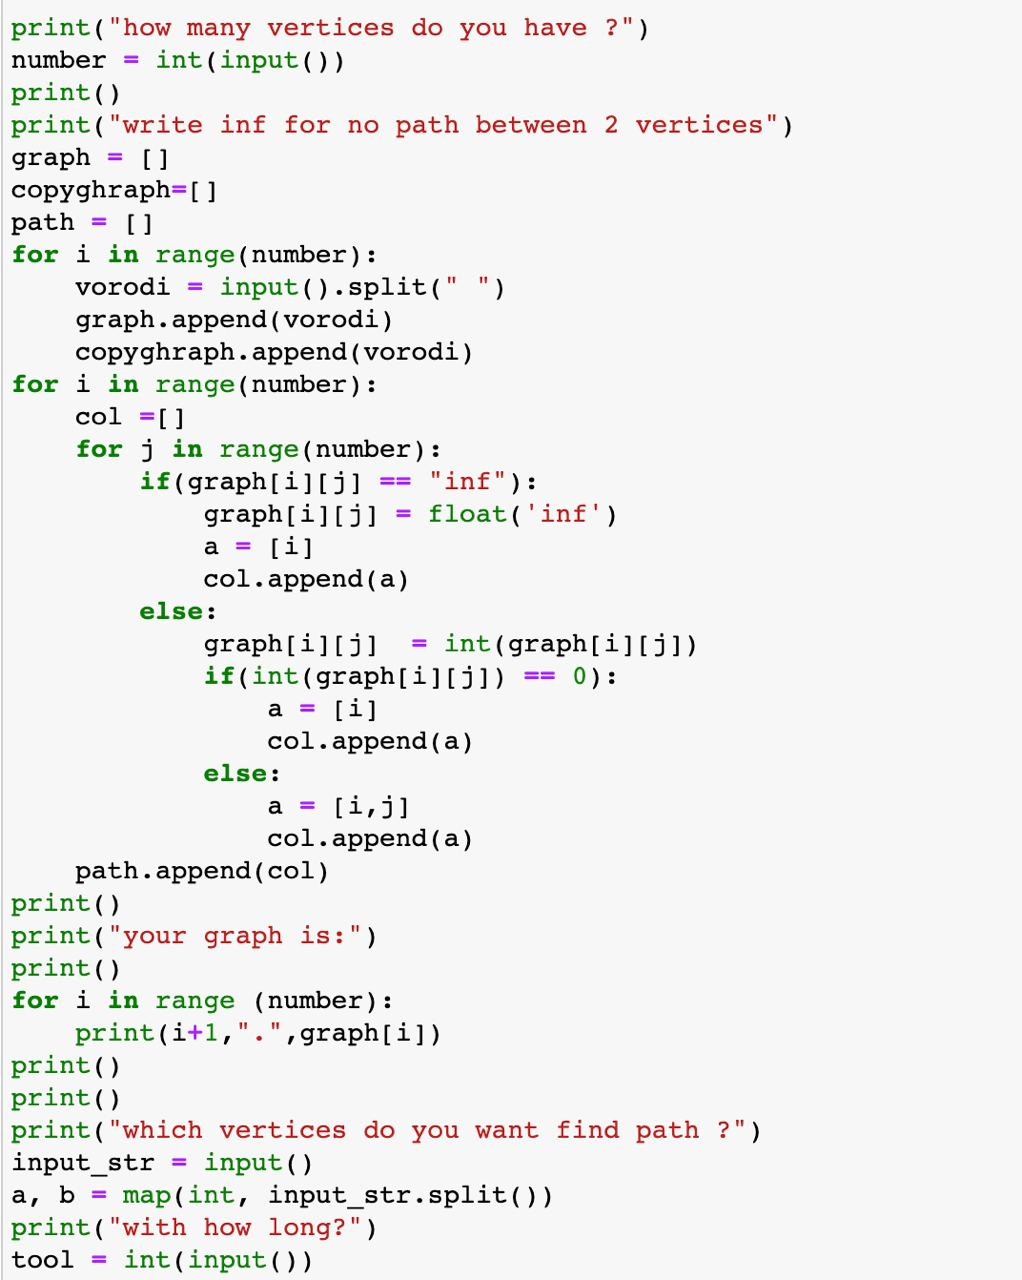

به دلیل مشکلات موجود در کپی کردن یک عضو لیست در لیست دیگر از متد های کپی استفاده شده
    و در ادامه طول مسیر از کاربر پرسیده میشود اگر ۱ بود طبعا خود تابع اولیه و مسیر ها همان یال های موجود در گراف اولیه هستند پس این موضوع در پیاده سازی در نظر گرفته میشود و برای ساخت مسیر های با طول های بیشتر از ۱ پیاده سازی بدین شکل می باشد :
    

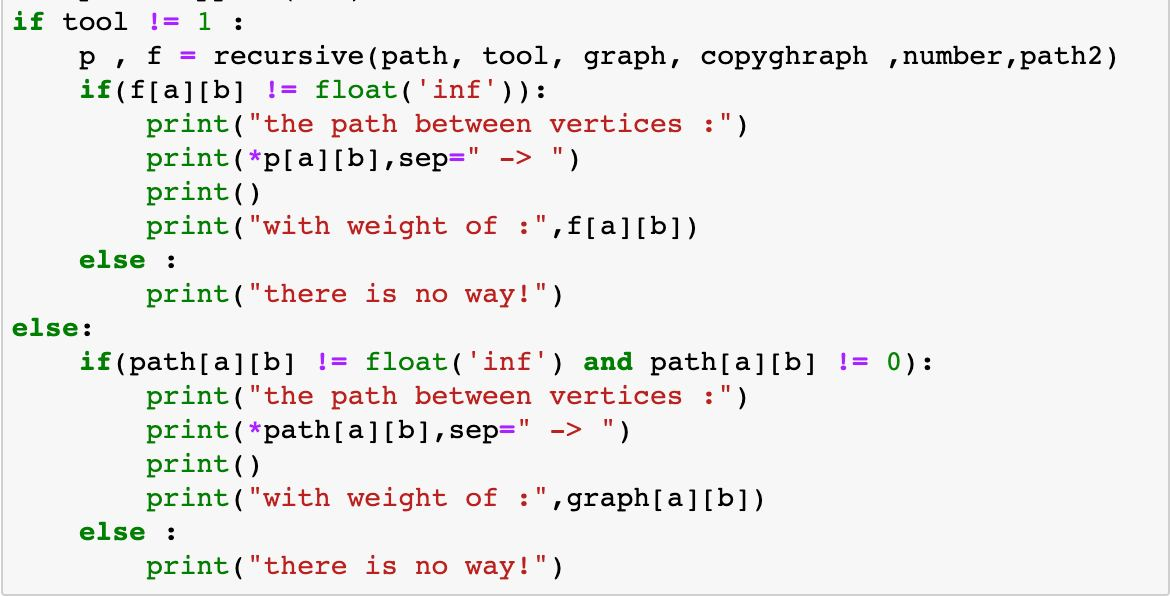

تابع فایند مین کاری برای پیدا کردن مسیر بین ۲ راس طراحی شده که در واقع دو ماتریس ورودی میگیره و میاد ضرب ماتریس رو انجام میده در نهایت با نگه داشتن مینیم مقدار و مسیر ، ماتریس نهایی به همراه مسیر را می سازد

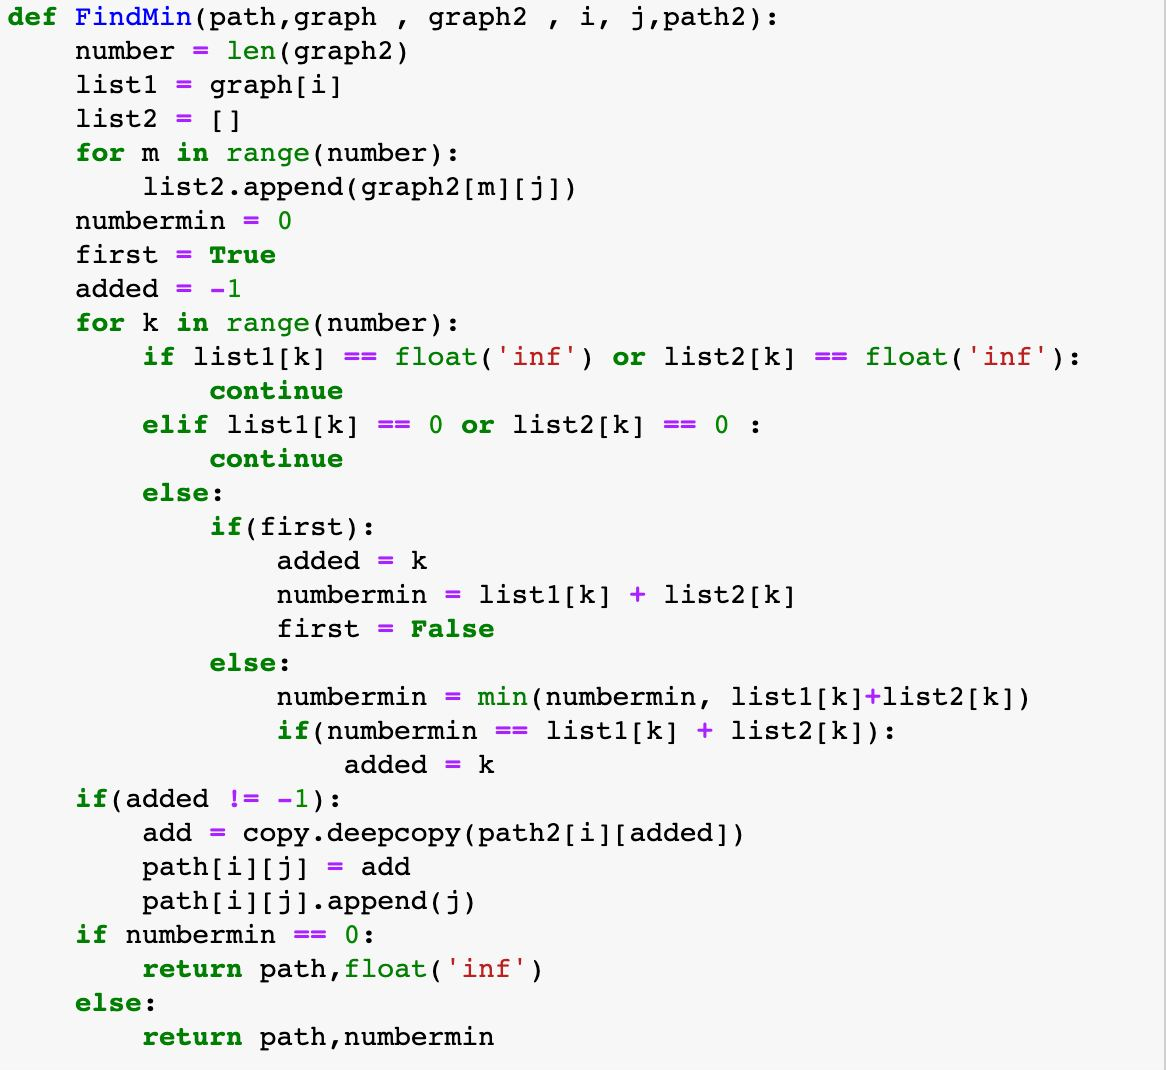

نکته مهم تابع
ریکرسیو
بازگشتی بودن آن هستش که برای ساخت مسیر های به طول بالا با استفاده از ماتریس های ساخته شده مرتبه قبلی و ماتریس اولیه ساخت ماتریس مورد نظر را انجام میدهد


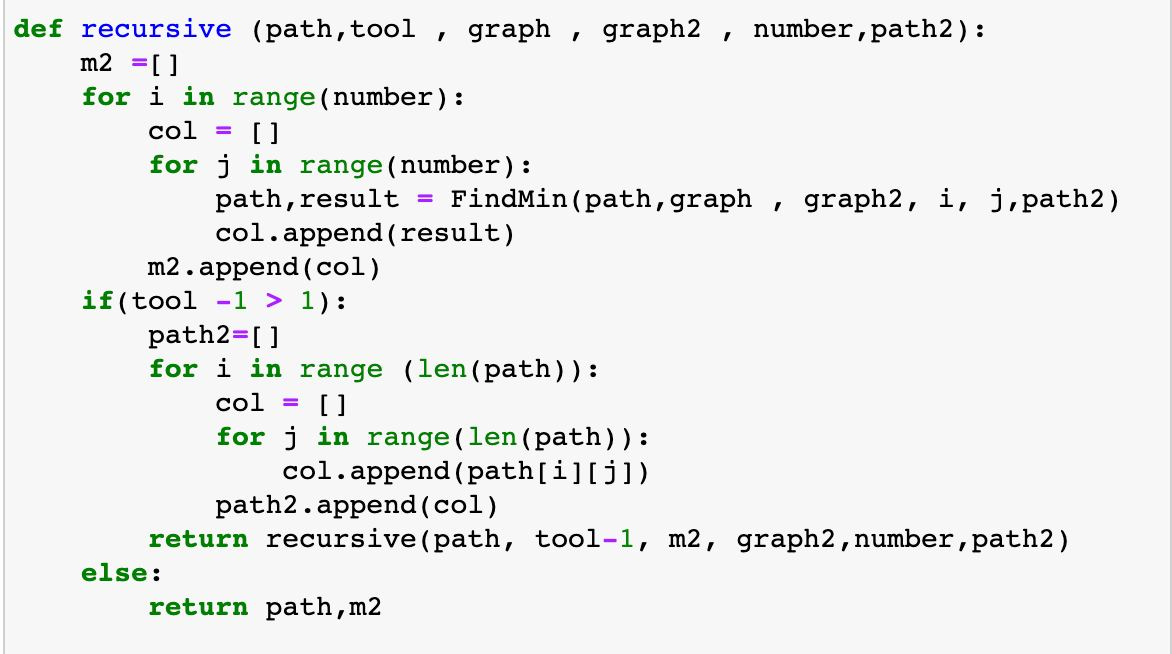

و درنهایت برای خروجی دادن مسیر مورد نظر و وزن مسیر ، ابتدا مشخص میکنیم که مسیر وجود دارد یا خیر که در پیاده سازی در نظر گرفته شده در غیر اینصورت مسیر از ابتدا تا انتها در یک خط چاپ میشود و سپس وزن آن را از با استفاده از درایه مربوط به دو راس مورد نظر در گراف بدست می آوریم

نکته ای که لازم به ذکر هستش برای نگه داشتن و پاس دادن مسیر های ماتریس با مرتبه کمتر این هستش که اگر بین دو راس ۱ و ۲ اگر راس ۳ باعث کوتاه تر شدن مسیر میشود به شکلی که ۱ به ۳ و سپس ۳ به ۲ ، مسیر ۱ به ۳ را از ماتریس مسیر لیست مرتبه پایین تر به لیست مسیر های حال حاضر اضافه میکنیم و راس نهایی را به لیست اضافه کرده تا مسیر تشکیل شود  

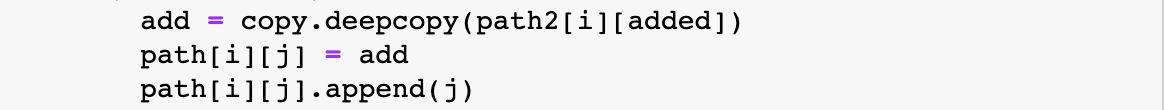

تمام